### Challenge Homepage

https://priceisyourright.org/

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# TODO:

- create groupings for services rendered 
- give the conditional probability of multiple procedures being accounted for
- give a cost estimate for the procedures given a users insurance / location
- suggest the top 3 recommendations based on the criteria

## Load data

In [3]:
ma_data = pd.read_csv('data/CHAI_MA-cost-estimates.csv')
nh_data = pd.read_csv('data/NHID_cost-estimates.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,47,48,49,51,52,53,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('num rows massachussetts data:', len(ma_data))
print('num rows new hampshire data:', len(nh_data))

num rows massachussetts data: 113813
num rows new hampshire data: 67809


## Filter data down to columns of relevance

In [5]:
ma_data_slim = ma_data[['ProviderOrgName_Anchored', 'ProviderTaxonomyType', 'ProviderTaxonomyGroup',  'ZIP',
 'ServiceCode',
 'CostEstimate',
 'NumberServices',
 'ServiceType_Level1',
 'ServiceType_Level2',
 'ServiceType_Level3',
 'ServiceType_Level4',
 'ServiceDescription',
 'NumberProvs_forPayerAndService',
 'NumberServices_All',
 'TotalCost_All']].sample(frac=1)

In [6]:
nh_data_slim = nh_data[['PROCEDURE_CODE',
 'PROCEDURE_NAME',
 'SHORT_DESCRIPTION',
 'CATEGORY_NAME',
 'COVERAGE_CLASS',
 ' MED_ALLOW ',
 'PRICE_PERCISION',
 'PATIENT_COMPLEXITY',
 'PAYER',
 'PLAN_TYPE',
 'PROVIDER_NAME']].sample(frac=1)

## Basic Preprocessing

In [7]:
nh_data_slim['PROCEDURE_CODE_STR']= nh_data_slim.PROCEDURE_CODE.apply(str)

In [8]:
ma_data_slim['ServiceCode_STR'] = ma_data_slim.ServiceCode.apply(str)

### Group services into buckets

In [9]:
nh_data_slim.CATEGORY_NAME.value_counts()

Diagnostic Services                12265
Office Visits                      11074
Dental Fillings                     8418
Laboratory Services                 7410
Behavioral Health Care              7233
Preventive Care                     6219
Physical Therapy                    4963
Radiology Services                  3459
Other Dental Services               1755
Ambulance Services                  1625
Outpatient Tests and Procedures     1378
Chiropractic Care                   1377
Emergency Visits                     511
Orthodontic Services                 122
Name: CATEGORY_NAME, dtype: int64

In [38]:
nh_data_slim.head()

PROCEDURE_CODE                                     PROCEDURE_NAME  \
39435          D0120         Periodic dental exam - established patient   
17791          90837                          60 Minute - Psychotherapy   
55226          D1206               Topical fluoride varnish application   
59760          D2160  Silver (Amalgam) Dental Filling - Three surfac...   
22354          97140                                Manual Therapy - PT   

                                       SHORT_DESCRIPTION  \
39435         Periodic dental exam - established patient   
17791                          60 Minute - Psychotherapy   
55226               Topical fluoride varnish application   
59760  Silver (Amalgam) Dental Filling - Three surfac...   
22354                                Manual Therapy - PT   

                CATEGORY_NAME COVERAGE_CLASS  MED_ALLOW  PRICE_PERCISION  \
39435     Diagnostic Services            DEN        $42              LOW   
17791  Behavioral Health Care            MED       $126             HIGH   
55226         Preventive Care            DEN        $41             HIGH   
59760         Dental Fillings            DEN       $365             HIGH   
22354        Physical Therapy            MED        $75              LOW   

      PATIENT_COMPLEXITY              PAYER  \
39435                NaN  Delta Dental - NH   
17791                NaN        Anthem - NH   
55226                NaN  Delta Dental - NH   
59760                NaN              Cigna   
22354                NaN              Cigna   

                                       PLAN_TYPE  \
39435                           All Dental Plans   
17791  Individual (self-purchased) Medical Plans   
55226                           All Dental Plans   
59760                           All Dental Plans   
22354             Group (employer) Medical Plans   

                                           PROVIDER_NAME PROCEDURE_CODE_STR  
39435                              BEDFORD DENTAL CENTER              D0120  
17791  NEW ENGLAND INSTITUTE FOR MARRIAGE AND FAMILY ...              90837  
55226                             CAPSTONE DENTAL CENTER              D1206  
59760                            AESTHETIC DENTAL CENTER              D2160  
22354                            CHESHIRE MEDICAL CENTER              97140

In [10]:
ma_data_slim.ServiceType_Level1.value_counts()

Office Visits                        61905
Behavioral Health                    17815
Physical and Occupational Therapy    11109
Laboratory and Pathology Testing     10378
Radiology                             6342
Eye exams                             3499
Ambulance/Transportation Services      949
Colonoscopy and Endoscopy              706
Maternity                              684
Emergency Department Visits            426
Name: ServiceType_Level1, dtype: int64

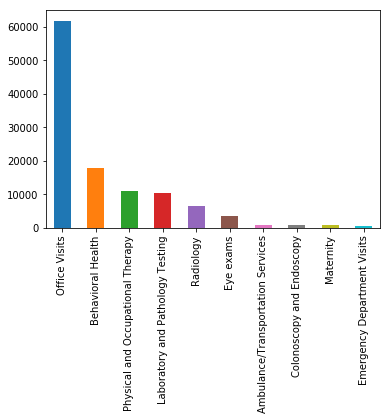

In [11]:
ma_data_slim['ServiceType_Level1'].value_counts().plot(kind='bar')

In [12]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level2'].value_counts()

Moderate severity problems                         114
High severity but non-life-threatening problems     96
Low to moderate severity problems                   85
Life-threatening problems                           74
Minor problems                                      57
Name: ServiceType_Level2, dtype: int64

In [13]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level3'].value_counts()

Series([], Name: ServiceType_Level3, dtype: int64)

In [14]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level4'].value_counts()

Series([], Name: ServiceType_Level4, dtype: int64)

In [15]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level2'].value_counts()

Presenting with a problem    45763
Preventive care              14537
Consultation                  1605
Name: ServiceType_Level2, dtype: int64

In [16]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level3'].value_counts()

Established patient    47788
New patient            12512
60 minutes               751
40 minutes               611
80 minutes               132
30 minutes                99
15 minutes                12
Name: ServiceType_Level3, dtype: int64

In [17]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level4'].value_counts()

15 minutes         15090
25 minutes         12994
Age 18 to 39        5107
Age 40 to 64        4807
30 minutes          4291
10 minutes          4007
45 minutes          3626
40 minutes          2381
20 minutes          1433
Age 0 to 1          1187
60 minutes          1177
Age 5 to 11         1114
Age 12 to 17        1045
Age 1 to 4           840
5 minutes            764
Age 65 or older      437
Name: ServiceType_Level4, dtype: int64

## CPT codes mapping between data sets

- <b>nh_data.PROCEDURE_CODE is equal to ma_data.ServiceCode</b>

In [18]:
nh_data_slim.loc[nh_data_slim.PROCEDURE_CODE_STR == '70450'].head()

PROCEDURE_CODE                PROCEDURE_NAME  \
1506          70450  CT - Head/Brain, without dye   
1494          70450  CT - Head/Brain, without dye   
1491          70450  CT - Head/Brain, without dye   
1478          70450  CT - Head/Brain, without dye   
1479          70450  CT - Head/Brain, without dye   

                 SHORT_DESCRIPTION       CATEGORY_NAME COVERAGE_CLASS  \
1506  CT - Head/Brain, without dye  Radiology Services            MED   
1494  CT - Head/Brain, without dye  Radiology Services            MED   
1491  CT - Head/Brain, without dye  Radiology Services            MED   
1478  CT - Head/Brain, without dye  Radiology Services            MED   
1479  CT - Head/Brain, without dye  Radiology Services            MED   

      MED_ALLOW  PRICE_PERCISION PATIENT_COMPLEXITY                    PAYER  \
1506     $1,522         VERY LOW             MEDIUM  Other Medical Insurance   
1494       $348           MEDIUM             MEDIUM              Anthem - NH   
1491     $1,766           MEDIUM               HIGH       Harvard Pilgrim HC   
1478       $776           MEDIUM             MEDIUM              Anthem - NH   
1479     $1,298           MEDIUM             MEDIUM                    Cigna   

                                      PLAN_TYPE                 PROVIDER_NAME  \
1506             Group (employer) Medical Plans               ELLIOT HOSPITAL   
1494  Individual (self-purchased) Medical Plans    SOUTHERN NH MEDICAL CENTER   
1491             Group (employer) Medical Plans  PORTSMOUTH REGIONAL HOSPITAL   
1478             Group (employer) Medical Plans           ST. JOSEPH HOSPITAL   
1479             Group (employer) Medical Plans           ST. JOSEPH HOSPITAL   

     PROCEDURE_CODE_STR  
1506              70450  
1494              70450  
1491              70450  
1478              70450  
1479              70450

In [19]:
ma_data_slim.loc[ma_data_slim.ServiceCode_STR == '70450'].head()

ProviderOrgName_Anchored  \
1286                   Baystate Franklin Medical Center   
1313  Massachusetts General Physicians Organization,...   
1377                                St. Luke's Hospital   
1299            South County Hospital Healthcare System   
1321                                Norwood Urgent Care   

              ProviderTaxonomyType         ProviderTaxonomyGroup   ZIP  \
1286   General Acute Care Hospital                Acute Hospital  1301   
1313  Multi-Specialty Organization  Multi-Specialty Organization  2114   
1377   General Acute Care Hospital                Acute Hospital  2740   
1299   General Acute Care Hospital                Acute Hospital  2879   
1321                 Clinic/Center                        Clinic  2062   

     ServiceCode  CostEstimate  NumberServices ServiceType_Level1  \
1286       70450        511.84             111          Radiology   
1313       70450        382.25             116          Radiology   
1377       70450        331.43             516          Radiology   
1299       70450        973.33              23          Radiology   
1321       70450        283.86              52          Radiology   

     ServiceType_Level2 ServiceType_Level3 ServiceType_Level4  \
1286            CT Scan      Head or brain   Without contrast   
1313            CT Scan      Head or brain   Without contrast   
1377            CT Scan      Head or brain   Without contrast   
1299            CT Scan      Head or brain   Without contrast   
1321            CT Scan      Head or brain   Without contrast   

                                     ServiceDescription  \
1286  CT scan of head or brain, diagnostic, without ...   
1313  CT scan of head or brain, diagnostic, without ...   
1377  CT scan of head or brain, diagnostic, without ...   
1299  CT scan of head or brain, diagnostic, without ...   
1321  CT scan of head or brain, diagnostic, without ...   

      NumberProvs_forPayerAndService  NumberServices_All  TotalCost_All  \
1286                             105                 111       56506.20   
1313                             105                 116       44957.12   
1377                             105                 516      167867.34   
1299                             105                  23       20173.60   
1321                             105                  52       12535.34   

     ServiceCode_STR  
1286           70450  
1313           70450  
1377           70450  
1299           70450  
1321           70450

In [20]:
nh_data_slim[['PROCEDURE_CODE', 'PROCEDURE_NAME']].head(20)

PROCEDURE_CODE                                     PROCEDURE_NAME
39435          D0120         Periodic dental exam - established patient
17791          90837                          60 Minute - Psychotherapy
55226          D1206               Topical fluoride varnish application
59760          D2160  Silver (Amalgam) Dental Filling - Three surfac...
22354          97140                                Manual Therapy - PT
46262          D0220  X-Ray Dental - Intraoral - periapical radiogra...
36517          99396             Comp Preventive Medicine 40-64 yrs old
26606          99203                          Office Visit, New Pt, Low
6058           80061                     Lipid Panel - Cholesterol Test
12683          90791                Diagnostic Evaluation - Psychiatric
55420          D1208                     Fluoride - Topical Application
65476          D4341  Plaque and tartar removal from around teeth an...
33918          99392               Comp Preventive Medicine 1-4 yrs old
47669          D0272              X-Ray Dental - Two images - bitewings
6515           80076                     Hepatic (Liver) Function Panel
19889          97014                Electrical Stimulation Therapy - PT
27468          99212                                 Basic Office Visit
59304          D2160  Silver (Amalgam) Dental Filling - Three surfac...
61946          D2331  White (Resin) Dental Filling - Two surfaces, a...
966            45378                Diagnostic colonoscopy (outpatient)

## Breakdown of services and costs rendered by Provider

In [21]:
ma_data_slim.groupby('ProviderOrgName_Anchored')[['ServiceCode', 'CostEstimate']].agg({'ServiceCode': lambda x: list(x), 'CostEstimate': ['sum', 'mean', 'median']})

ServiceCode  \
                                                                                             <lambda>   
ProviderOrgName_Anchored                                                                                
1 On 1 Eyecare                                                                         [92004, 92014]   
2 Thumbs Up Hand Therapy LLC                        [97110, 97003, 97140, 97530, 97140, 97003, 971...   
20 20 Eye Care PC                                                 [92012, 92002, 92004, 92014, 99213]   
60 Quaker Highway Inc.                                     [97002, 97530, 97112, 97110, 97001, 97140]   
711 Pedicare                                                                                  [99214]   
A Better Way To Cope: Psychotherapy And Consult...                                     [90834, 90834]   
A Chiropractic Wellness Place PC                                                              [97112]   
A F Calvanese MD PC                                 [99213, 99212, 99395, 99396, 99214, 99215, 993...   
A Gale Maynard LICSW                                                                   [90834, 90791]   
A Plus Chiropractic Management Inc                                [97012, 99213, 97110, 97140, 97110]   
A Richard Cote M.D.                                        [92004, 92014, 92002, 99213, 99212, 92012]   
A Step Above Physical Therapy                              [97110, 97112, 97530, 97530, 97002, 97110]   
A Touch of Health Chiropractic, LLC                                                    [97012, 97110]   
A.F.A. Obstetrics & Gynecology, P.C.                [99396, 99203, 99214, 99395, 99214, 99395, 992...   
ATI Physical Therapy of Western Massachusetts       [97112, 97110, 97110, 97001, 97140, 97002, 970...   
Aafaque Akhter M.D.                                                                           [99213]   
Aaron A Hoffman MA                                                              [90791, 90847, 90834]   
Aaron C Drouin D.C.                                                                           [97140]   
Aaron M Selfridge D.C.                                                          [97140, 99203, 97110]   
Aaron Mathew Walsh D.C.                                                                       [97112]   
Aaron Michael Price LICSW                                                                     [90834]   
Aarrow Straight Chiropractic                                      [97110, 97530, 97012, 97012, 97112]   
Aarti Khullar PsyD                                                                            [90834]   
Aasp Allergy & Asthma Specialty Physicians, PC      [99244, 99212, 99213, 99203, 99204, 99213, 99213]   
Abacus Health & Wellness, LLC                                                          [97140, 97112]   
Abbey Medical Associates PC                                       [99386, 99204, 99213, 99396, 99214]   
Abbie Rosenberg RN CS                                                           [99214, 99213, 90834]   
Abby Lisa Stein M.Ed.,LICSW                                                                   [90834]   
Abby Rodman LICSW                                                                             [90834]   
Abby Seixas L.M.H.C.                                                                          [90834]   
Abc Family Chiropractic And Wellness Inc.                                                     [97012]   
Abc Health Services Inc                                                                [97112, 72100]   
Abdul Ghaffar M.D.                                                                            [99204]   
Abdul M Khadra M.D.                                                                    [99214, 99395]   
Abelard Psychotherapy, LLC                          [99214, 90834, 90834, 99214, 90834, 90792, 907...   
Abigail B Blackburn Psy.D.                                                             [90837, 90834

## Mapping of Service Codes to available Provider and aggregate cost of service

In [23]:
ma_data_slim.groupby('ServiceCode')[['ProviderOrgName_Anchored', 'CostEstimate']].agg({'ProviderOrgName_Anchored': lambda x: list(x), 'CostEstimate': ['sum', 'mean', 'median']})

ProviderOrgName_Anchored  \
                                                             <lambda>   
ServiceCode                                                             
90847               [Kathleen K Davis PhD, LICSW, Alan Roy PsyD LL...   
90853               [Joseph Papa MSW, Barbara J Samek LICSW, Lisa ...   
92002               [Lexington Eye Associates, Inc, James Andrews ...   
92004               [Fischer Eye Care PC, Twin City Eye Care, Eye ...   
92012               [Kem Optical P.C., D'Ambrosio Eye Care, Inc., ...   
92014               [Braintree Vision Associates, Lynn Community H...   
96101               [Child Development Network, Boston Psychologic...   
96102               [Child & Family Psychological Services, Inc., ...   
96103               [Child & Family Psychological Services, Inc., ...   
96105               [Psycholinguistic Associates, Inc., Childrens ...   
96111               [Massachusetts General Physicians Organization...   
96116               [Baystate Medical Center, Brigham And Women's ...   
96118               [Massachusetts General Physicians Organization...   
96119               [Brigham And Women's Physicians Organization -...   
96120               [Child & Family Psychological Services, Inc., ...   
96150               [Bridgewater Pediatrics LLC, Child & Family Ps...   
96151               [Bridgewater Pediatrics LLC, Sandra L Crump Ph...   
96152               [New Horizon Health And Wellness, Jonathan Edw...   
96153               [Bay Cove Early Intervention, Associates for H...   
96154               [Neuro-Psychology Associates of Western Massac...   
96155                                [Pathways of Massachusetts, LLC]   
97001               [Prescription Orthopedic And Sports Therapy, O...   
97002               [Marathon Physical Therapy And Sports Medicine...   
97003               [Excel Orthopedic Specialists, Harmeling Physi...   
97004               [Children's Hospital Boston, Cooley Dickinson ...   
97012               [Seth L Levine DC, O'Brien Chiropractic Office...   
97016               [Excel Orthopaedic Specialists, Jump Start Phy...   
97110               [Apple Nashua, West Bay Orthopaedics And Neuro...   
97112               [Bay State Physical Therapy of Randolph PC, Pa...   
97116               [Ashland Physical Therapy & Sports Medicine, I...   
97124               [Sandwich Physical Therapy, Inc, Daniel P. Dre...   
97140               [Doctor's Physio, Healthsouth Rehabilitation H...   
97150               [Whittier Rehabilitation Hospital-Westborough,...   
97530               [Orthopedic Rehab Associates PC, South Shore T...   
97535               [Massachusetts Eye And Ear Infirmary, Blue Hil...   
97750               [South Shore Hospital Inc., ObGyn Associates o...   
97760               [Beth Israel Deaconess Hospital Milton Inc, Sa...   
97762               [Massachusetts General Hospital, Lahey Clinic ...   
99201               [Merrimack Valley Oral Surgeons, Inc, North En...   
99202               [Lowell Surgical Associates, P.C., Middlesex S...   
99203               [Medical Care of Boston Management Corporation...   
99204               [Woman Well Inc, Cambridge Otolaryngology, UMA...   
99205               [Mt Auburn Professional Services, Massachusett...   
99211               [Pediatrics at Newton Wellesley, PC, East Moun...   
99212               [Foundation Medical Partners Inc, South Shore ...   
99213               [Medical Care of Boston Management Corporation...   
99214               [Harvard Vanguard Medical Associates, Harvard ...   
99215               [Brigham And Women's Physicians Organization -...   
99241               [Massachusetts General Physicians Organization...   
99242               [Dermatology - HMFP at BIDMC, Robert J Obrien ...   
...                                                               ...   
86706               [Cambridge Health Alliance, Diagnostic Laborat...   
86787               [Quest Dia

In [71]:
pdf = ma_data_slim.groupby('ProviderOrgName_Anchored')[['ServiceCode', 'NumberServices']].agg({'ServiceCode': lambda x: list(x), 'NumberServices': lambda x: list(x)}).reset_index()

In [72]:
pdf['NumberServices_TOTAL'] = pdf.NumberServices.apply(sum)

In [73]:
pdf['ServiceRatio'] = pdf.apply(lambda row: [round(row['NumberServices'][i] / row['NumberServices_TOTAL'], 2) for i in range(len(row['ServiceCode']))], axis=1)

In [74]:
pdf.head()

ProviderOrgName_Anchored  \
0                1 On 1 Eyecare   
1  2 Thumbs Up Hand Therapy LLC   
2             20 20 Eye Care PC   
3        60 Quaker Highway Inc.   
4                  711 Pedicare   

                                         ServiceCode  \
0                                     [92004, 92014]   
1  [97110, 97003, 97140, 97530, 97140, 97003, 971...   
2                [92012, 92002, 92004, 92014, 99213]   
3         [97002, 97530, 97112, 97110, 97001, 97140]   
4                                            [99214]   

                                      NumberServices  NumberServices_TOTAL  \
0                                          [349, 42]                   391   
1  [417, 43, 181, 48, 362, 21, 201, 284, 193, 63,...                  2251   
2                            [215, 72, 255, 728, 91]                  1361   
3                         [97, 16, 95, 139, 16, 141]                   504   
4                                               [22]                    22   

                                        ServiceRatio  
0                                       [0.89, 0.11]  
1  [0.19, 0.02, 0.08, 0.02, 0.16, 0.01, 0.09, 0.1...  
2                     [0.16, 0.05, 0.19, 0.53, 0.07]  
3               [0.19, 0.03, 0.19, 0.28, 0.03, 0.28]  
4                                              [1.0]

In [41]:
ma_data_slim.loc[ma_data_slim.ProviderOrgName_Anchored == '60 Quaker Highway Inc.']

ProviderOrgName_Anchored ProviderTaxonomyType ProviderTaxonomyGroup  \
40992   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   
49362   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   
45124   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   
44555   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   
39551   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   
47865   60 Quaker Highway Inc.   Physical Therapist    Physical Therapist   

        ZIP ServiceCode  CostEstimate  NumberServices  \
40992  1569       97002        50.000              97   
49362  1569       97530         1.440              16   
45124  1569       97112        23.190              95   
44555  1569       97110        32.580             139   
39551  1569       97001        77.250              16   
47865  1569       97140        17.185             141   

                      ServiceType_Level1 ServiceType_Level2  \
40992  Physical and Occupational Therapy   Physical therapy   
49362  Physical and Occupational Therapy   Physical therapy   
45124  Physical and Occupational Therapy   Physical therapy   
44555  Physical and Occupational Therapy   Physical therapy   
39551  Physical and Occupational Therapy   Physical therapy   
47865  Physical and Occupational Therapy   Physical therapy   

                                      ServiceType_Level3 ServiceType_Level4  \
40992                                      Re-evaluation                NaN   
49362  Therapeutic activities to improve function, wi...                NaN   
45124  Therapeutic procedure to re-educate brain-to-n...                NaN   
44555  Therapeutic exercise to develop strength, endu...                NaN   
39551                                         Evaluation                NaN   
47865  Manual (physical) therapy techniques to 1 or m...                NaN   

                                      ServiceDescription  \
40992                     Physical therapy re-evaluation   
49362  Physical therapy exercise, in-person with ther...   
45124  Therapy for neuromuscular reeducation - 15 min...   
44555            Physical therapy exercises - 15 minutes   
39551                        Physical therapy evaluation   
47865  Manual for one or more regions of body - 15 mi...   

       NumberProvs_forPayerAndService  NumberServices_All  TotalCost_All  \
40992                             722                  97        4850.00   
49362                             852                  16          25.14   
45124                            1566                  95        2371.28   
44555                            2639                 139        6211.63   
39551                            1497                  16        1236.00   
47865                            2213                 141        4276.91   

      ServiceCode_STR  
40992           97002  
49362           97530  
45124           97112  
44555           97110  
39551           97001  
47865           97140

In [68]:
def jaccards(l1, l2):
    s1 = set(l1)
    s2 = set(l2)
    
    return len(s1 & s2) / len(s1 | s2)

## creating a pivot table with magnitudes of Service Codes.. similar to CSR Matrix so it can be used to do KNN

- https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
- http://www.ieee.ma/uaesb/pdf/distances-in-classification.pdf



In [97]:
ma_data_slim.pivot_table(index='ProviderOrgName_Anchored', columns='ServiceCode', values='NumberServices').fillna(0)

ServiceCode                                         90847  90853  92002  \
ProviderOrgName_Anchored                                                  
1 On 1 Eyecare                                        0.0    0.0    0.0   
2 Thumbs Up Hand Therapy LLC                          0.0    0.0    0.0   
20 20 Eye Care PC                                     0.0    0.0   72.0   
60 Quaker Highway Inc.                                0.0    0.0    0.0   
711 Pedicare                                          0.0    0.0    0.0   
A Better Way To Cope: Psychotherapy And Consult...    0.0    0.0    0.0   
A Chiropractic Wellness Place PC                      0.0    0.0    0.0   
A F Calvanese MD PC                                   0.0    0.0    0.0   
A Gale Maynard LICSW                                  0.0    0.0    0.0   
A Plus Chiropractic Management Inc                    0.0    0.0    0.0   
A Richard Cote M.D.                                   0.0    0.0   20.0   
A Step Above Physical Therapy                         0.0    0.0    0.0   
A Touch of Health Chiropractic, LLC                   0.0    0.0    0.0   
A.F.A. Obstetrics & Gynecology, P.C.                  0.0    0.0    0.0   
ATI Physical Therapy of Western Massachusetts         0.0    0.0    0.0   
Aafaque Akhter M.D.                                   0.0    0.0    0.0   
Aaron A Hoffman MA                                    0.0    0.0    0.0   
Aaron C Drouin D.C.                                   0.0    0.0    0.0   
Aaron M Selfridge D.C.                                0.0    0.0    0.0   
Aaron Mathew Walsh D.C.                               0.0    0.0    0.0   
Aaron Michael Price LICSW                             0.0    0.0    0.0   
Aarrow Straight Chiropractic                          0.0    0.0    0.0   
Aarti Khullar PsyD                                    0.0    0.0    0.0   
Aasp Allergy & Asthma Specialty Physicians, PC        0.0    0.0    0.0   
Abacus Health & Wellness, LLC                         0.0    0.0    0.0   
Abbey Medical Associates PC                           0.0    0.0    0.0   
Abbie Rosenberg RN CS                                 0.0    0.0    0.0   
Abby Lisa Stein M.Ed.,LICSW                           0.0    0.0    0.0   
Abby Rodman LICSW                                     0.0    0.0    0.0   
Abby Seixas L.M.H.C.                                  0.0    0.0    0.0   
Abc Family Chiropractic And Wellness Inc.             0.0    0.0    0.0   
Abc Health Services Inc                               0.0    0.0    0.0   
Abdul Ghaffar M.D.                                    0.0    0.0    0.0   
Abdul M Khadra M.D.                                   0.0    0.0    0.0   
Abelard Psychotherapy, LLC                            0.0    0.0    0.0   
Abigail B Blackburn Psy.D.                            0.0    0.0    0.0   
Abigail C Senna LMHC                                  0.0    0.0    0.0   
Abigail Judge Ph.D.                                   0.0    0.0    0.0   
Abigail Loewenstein M.A., LMHC                        0.0   15.0    0.0   
Abigail Morin Mcnally Ph.D.                           0.0    0.0    0.0   
Abigail Sarah Eaves M.A.                              0.0    0.0    0.0   
Abigail Shaw Macdonald MSW, LICSW                     0.0    0.0    0.0   
Abigail Stuart Demarzo LMHC                           0.0    0.0    0.0   
Abilities Rehabilitation Center, LLC                  0.0    0.0    0.0   
Abington Family Healthcare, LLC                       0.0    0.0    0.0   
Abington Pediatrics, PC                               0.0    0.0    0.0   
Abk Counseling & Wellness, LLC                        0.0    0.0    0.0   
Ablebodies                                            0.0    0.0    0.0   
Aboualkheir Alzaim MD                                 0.0    0.0    0.0   
About Women By Women A Professional Corporation       0.0    0.0    0.0   
...                                                   ...    ...    ...   
Xochitl Kountz LMHC      

In [80]:
test_src = [97002, 97530, 97112, 97110, 97001, 97140] # this could be re

def compare_similarity(src_row, df):
        base = src_row['ServiceCode']
        
        for row in df.iterrows():
            sc = row['ServiceCode']
        
            
        

[(92004, 0.89), (92014, 0.11)]

In [67]:
jaccards(, [92012, 92002, 92004, 92014, 99213])
jaccards([99396, 99214, 99395, 99213, 99385, 99203], [99395, 99396, 99203, 99212, 99214, 99215])

0.5

## Next Steps:
- create new dataframe with Provider, CPT codes, Number of Services
- Normalize NumberServices for a given provider to determine the ratio they provide a certain service
- We create a jaccard similarity between Diff Providers on Services Provided
- We create a wedighted jaccard similarity based on Diff PRoviers + ratioOfServicesOffered
- We do an avg of the two scores to determine a new final score of how alternative providers
- Do this on the provider level (not provider org name)

# Link farm of interesting resources:
- https://www.cdc.gov/nchs/fastats/emergency-department.htm
- https://www.masscomparecare.gov/
